<a href="https://colab.research.google.com/github/JonerciJon/CSST101-3B-AY2526/blob/main/Assesment_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Unification

In [ ]:



rule_predicate = "Eligible"
rule_variable = "x"


fact_predicate = "Eligible"
fact_constant = "Ana"


if rule_predicate == fact_predicate:

    substitution = {rule_variable: fact_constant}
    print(" Unification successful!")
    print("Substitution set:", substitution)
else:
    print(" Cannot unify. Predicates do not match.")


✅ Unification successful!
Substitution set: {'x': 'Ana'}


2. Forward Chaining

In [ ]:
students = {
    "Juan":   {"HighGrades": True,  "StudentLeader": True,  "Applied": True},
    "Maria":  {"HighGrades": True,  "StudentLeader": False, "Applied": False},
    "Carlos": {"HighGrades": False, "StudentLeader": True,  "Applied": False},
    "Ana":    {"HighGrades": True,  "StudentLeader": True,  "Applied": True}
}


eligible = {s for s,f in students.items() if f["HighGrades"] and f["StudentLeader"] and f["Applied"]}
scholarship = eligible.copy()
financial = scholarship.copy()


for s in students:
    derived = []
    if s in eligible:
        derived.append("Eligible")
    if s in scholarship:
        derived.append("Scholarship")
    if s in financial:
        derived.append("FinancialSupport")
    print(f"{s}: {', '.join(derived) if derived else 'No new derived facts'}")


for s in ["Maria","Carlos"]:
    f = students[s]
    reasons = [r for r,b in [
        ("No HighGrades", not f["HighGrades"]),
        ("Not StudentLeader", not f["StudentLeader"]),
        ("Did not apply", not f["Applied"])
    ] if b]
    print(f"{s} not eligible because:", ", ".join(reasons))


Juan: Eligible, Scholarship, FinancialSupport
Maria: No new derived facts
Carlos: No new derived facts
Ana: Eligible, Scholarship, FinancialSupport
Maria not eligible because: Not StudentLeader, Did not apply
Carlos not eligible because: No HighGrades, Did not apply


`Goal 1: Scholarship(Maria)`

Step 1 – Check Facts:
Maria has: Yes: HighGrades , Not A StudentLeader , Not Applied .

Step 2 – Apply the Rule:
Rule says Eligible(x) → Scholarship(x), so we must check if Maria is Eligible.

Step 3 – Check the Subgoals (Eligibility):
To be Eligible → HighGrades ∧ StudentLeader ∧ Applied.
Maria does not have StudentLeader and did not Apply → subgoal fails.

Step 4 – Conclusion:
Because Maria is not Eligible, she does not get Scholarship.
No Scholarship(Maria) = False.


`Goal 2: FinancialSupport(Ana)`

Step 1 – Check Facts:
Ana has: HighGrades , StudentLeader , Applied .

Step 2 – Apply the Rule:
Rule says Scholarship(x) → FinancialSupport(x), so we must check if Ana has Scholarship.

Step 3 – Check the Subgoals (Scholarship):
Scholarship(x) comes from Eligible(x).
Eligible(x) requires HighGrades ∧ StudentLeader ∧ Applied.
Ana satisfies all three → Eligible(Ana)  → Scholarship(Ana) .

Step 4 – Conclusion:
Since Ana has Scholarship → she also has FinancialSupport.
 FinancialSupport(Ana) = True.

3. Backward Chaining

In [1]:

students = {
    "Juan":   {"HighGrades": True,  "StudentLeader": True,  "Applied": True},
    "Maria":  {"HighGrades": True,  "StudentLeader": False, "Applied": False},
    "Carlos": {"HighGrades": False, "StudentLeader": True,  "Applied": False},
    "Ana":    {"HighGrades": True,  "StudentLeader": True,  "Applied": True}
}

# --- Rules as functions ---
def eligible(x):
    s = students[x]
    return s["HighGrades"] and s["StudentLeader"] and s["Applied"]

def scholarship(x):
    return eligible(x)

def financial_support(x):
    return scholarship(x)


goals = [("Scholarship","Maria"), ("FinancialSupport","Ana")]

for g, name in goals:
    if g == "Scholarship":
        print(f"Goal: Scholarship({name})")
        print(" Check if Eligible first...")
        print("  Eligible:", eligible(name))
        print("  Scholarship:", scholarship(name))
    elif g == "FinancialSupport":
        print(f"\nGoal: FinancialSupport({name})")
        print(" Check if Scholarship first...")
        print("  Scholarship:", scholarship(name))
        print("  FinancialSupport:", financial_support(name))


Goal: Scholarship(Maria)
 Check if Eligible first...
  Eligible: False
  Scholarship: False

Goal: FinancialSupport(Ana)
 Check if Scholarship first...
  Scholarship: True
  FinancialSupport: True


4. Validity Check


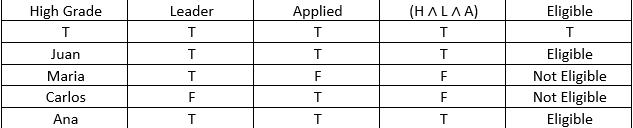

5. Reflection

Logical reasoning is important because it helps AI and people make clear and fair decisions. It allows us to use facts and rules step by step to reach correct conclusions. In real life, it helps us solve problems, avoid mistakes, and choose the best actions based on evidence. For students, its like using clear thinking to show your work in math  it makes decisions more reliable and easier to explain.